**Dependencies Install**

In [ ]:
!pip list

Package                               Version
------------------------------------- -------------------
absl-py                               1.4.0
accelerate                            1.9.0
aiofiles                              24.1.0
aiohappyeyeballs                      2.6.1
aiohttp                               3.11.15
aiosignal                             1.4.0
alabaster                             1.0.0
albucore                              0.0.24
albumentations                        2.0.8
ale-py                                0.11.2
altair                                5.5.0
annotated-types                       0.7.0
antlr4-python3-runtime                4.9.3
anyio                                 4.9.0
argon2-cffi                           25.1.0
argon2-cffi-bindings                  21.2.0
array_record                          0.7.2
arviz                                 0.22.0
astropy                               7.1.0
astropy-iers-data                     0.2025.7.21.0.

In [1]:
!pip install opencv-python matplotlib imageio gdown tensorflow

In [ ]:
# !pip install tensorflow==2.12.0 numpy==1.23.0 opencv-python==4.6.0.66 matplotlib==3.6.2 imageio==2.23.0 gdown==4.6.0


  Using cached tensorflow-2.12.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 99.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached opencv_python-4.6.0.66-cp36-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached matplotlib-3.6.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.8 kB)
  Using cached imageio-2.23.0-py3-none-any.whl.metadata (5.0 kB)
  Using cached gdown-4.6.0-py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.4.0-py3-none-any.whl.metadata (1.1 kB)
  Using cached keras-2.12.0-py2.py3-none-any.whl.metadata (1.4 kB)
INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to 

In [2]:
import os
import cv2
import tensorflow as tf
import numpy as np
from typing import List
from matplotlib import pyplot as plt
import imageio


In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
physical_device = tf.config.list_physical_devices('GPU')
try:
  tf.config.experimental.set_memory_growth(physical_device[0], True)
except:
  pass

# **1. Data Loading Function**

In [5]:
import gdown

In [6]:
url = 'https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL'
output = 'data.zip'
gdown.download(url, output, quiet=False)
gdown.extractall('data.zip')

Downloading...
From (original): https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL
From (redirected): https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL&confirm=t&uuid=22efd872-28df-46c2-ac3a-5b94863723f0
To: /content/data.zip
100%|██████████| 423M/423M [00:03<00:00, 112MB/s] 


['data/',
 'data/alignments/',
 'data/alignments/s1/',
 'data/alignments/s1/bbaf2n.align',
 'data/alignments/s1/bbaf3s.align',
 'data/alignments/s1/bbaf4p.align',
 'data/alignments/s1/bbaf5a.align',
 'data/alignments/s1/bbal6n.align',
 'data/alignments/s1/bbal7s.align',
 'data/alignments/s1/bbal8p.align',
 'data/alignments/s1/bbal9a.align',
 'data/alignments/s1/bbas1s.align',
 'data/alignments/s1/bbas2p.align',
 'data/alignments/s1/bbas3a.align',
 'data/alignments/s1/bbaszn.align',
 'data/alignments/s1/bbaz4n.align',
 'data/alignments/s1/bbaz5s.align',
 'data/alignments/s1/bbaz6p.align',
 'data/alignments/s1/bbaz7a.align',
 'data/alignments/s1/bbbf6n.align',
 'data/alignments/s1/bbbf7s.align',
 'data/alignments/s1/bbbf8p.align',
 'data/alignments/s1/bbbf9a.align',
 'data/alignments/s1/bbbm1s.align',
 'data/alignments/s1/bbbm2p.align',
 'data/alignments/s1/bbbm3a.align',
 'data/alignments/s1/bbbmzn.align',
 'data/alignments/s1/bbbs4n.align',
 'data/alignments/s1/bbbs5s.align',
 'data/al

In [7]:
def load_video(path:str) -> List[float]:
  cap = cv2.VideoCapture(path)
  frames = []
  try:
    for _ in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
      ret, frame = cap.read()
      if not ret:
          break # Break the loop if frame is not read correctly

      # Ensure the frame has a consistent shape, explicitly converting to 3 channels if needed
      if len(frame.shape) == 2:
          frame = cv2.cvtColor(frame, cv2.COLOR_GRAY2RGB)
      elif frame.shape[2] == 4:
          frame = cv2.cvtColor(frame, cv2.COLOR_RGBA2RGB)
      elif frame.shape[2] == 1:
          frame = cv2.cvtColor(frame, cv2.COLOR_GRAY2RGB)
      # If it's already 3 channels, no conversion needed here

      # Convert to grayscale
      frame = tf.image.rgb_to_grayscale(frame)

      # Apply slicing and then ensure the shape
      frame = frame[190:236,80:220,:] # Apply slicing first
      frame = tf.ensure_shape(frame, (46, 140, 1)) # Ensure the expected shape after grayscale and slicing


      frames.append(frame)

  finally:
    cap.release()

  if not frames: # Handle case where no frames were loaded
      return tf.constant([]) # Return an empty tensor or handle as appropriate

  mean = tf.math.reduce_mean(frames)
  std = tf.math.reduce_std(tf.cast(frames, tf.float32))
  # Avoid division by zero if std is zero
  if std == 0:
      return tf.cast((frames - mean), tf.float32)
  else:
      return tf.cast((frames - mean), tf.float32) / std

In [8]:
vocab = [x for x in "abcdefghijklmnopqrstuvwxyz'?!123456789 "]

In [9]:
char_to_num = tf.keras.layers.StringLookup(vocabulary=vocab, oov_token="")
num_to_char = tf.keras.layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), oov_token="", invert=True
)

print(
    f"The vocabukary is: {char_to_num.get_vocabulary()}"
    f"(size = {char_to_num.vocabulary_size()})"
)

The vocabukary is: ['', np.str_('a'), np.str_('b'), np.str_('c'), np.str_('d'), np.str_('e'), np.str_('f'), np.str_('g'), np.str_('h'), np.str_('i'), np.str_('j'), np.str_('k'), np.str_('l'), np.str_('m'), np.str_('n'), np.str_('o'), np.str_('p'), np.str_('q'), np.str_('r'), np.str_('s'), np.str_('t'), np.str_('u'), np.str_('v'), np.str_('w'), np.str_('x'), np.str_('y'), np.str_('z'), np.str_("'"), np.str_('?'), np.str_('!'), np.str_('1'), np.str_('2'), np.str_('3'), np.str_('4'), np.str_('5'), np.str_('6'), np.str_('7'), np.str_('8'), np.str_('9'), np.str_(' ')](size = 40)


In [10]:
char_to_num.get_vocabulary()

['',
 np.str_('a'),
 np.str_('b'),
 np.str_('c'),
 np.str_('d'),
 np.str_('e'),
 np.str_('f'),
 np.str_('g'),
 np.str_('h'),
 np.str_('i'),
 np.str_('j'),
 np.str_('k'),
 np.str_('l'),
 np.str_('m'),
 np.str_('n'),
 np.str_('o'),
 np.str_('p'),
 np.str_('q'),
 np.str_('r'),
 np.str_('s'),
 np.str_('t'),
 np.str_('u'),
 np.str_('v'),
 np.str_('w'),
 np.str_('x'),
 np.str_('y'),
 np.str_('z'),
 np.str_("'"),
 np.str_('?'),
 np.str_('!'),
 np.str_('1'),
 np.str_('2'),
 np.str_('3'),
 np.str_('4'),
 np.str_('5'),
 np.str_('6'),
 np.str_('7'),
 np.str_('8'),
 np.str_('9'),
 np.str_(' ')]

In [ ]:
char_to_num(['a','y','u','s','h'])

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([ 1, 25, 21, 19,  8])>

In [ ]:
num_to_char([1, 25, 21, 19, 8])

<tf.Tensor: shape=(5,), dtype=string, numpy=array([b'a', b'y', b'u', b's', b'h'], dtype=object)>

In [11]:
def load_alignments(path:str) -> List[str]:
    with open(path, 'r') as f:
        lines = f.readlines()
    tokens = []
    for line in lines:
        line = line.split()
        if line[2] != 'sil':
            tokens = [*tokens,' ',line[2]]
    return char_to_num(tf.reshape(tf.strings.unicode_split(tokens, input_encoding='UTF-8'), (-1)))[1:]

In [12]:
def load_data(path: str):
    path = bytes.decode(path.numpy())
    # Explicitly handle both forward and backslashes for splitting
    file_name = path.replace('\\', '/').split('/')[-1].split('.')[0]
    video_path = os.path.join('data','s1',f'{file_name}.mpg')
    alignment_path = os.path.join('data','alignments','s1',f'{file_name}.align')
    frames = load_video(video_path)
    alignments = load_alignments(alignment_path)

    return frames, alignments

In [13]:
test_path = '.\\data\\s1\\bbal6n.mpg'

In [14]:
tf.convert_to_tensor(test_path).numpy().decode('utf-8').split('\\')[-1].split('.')[0]

'bbal6n'

In [15]:
frames, alignments = load_data(tf.convert_to_tensor(test_path))

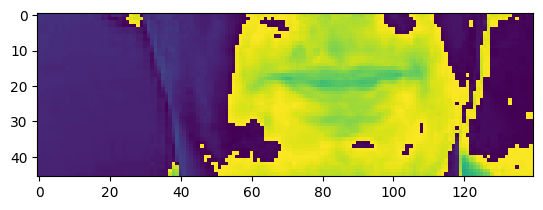

In [16]:
plt.imshow(frames[8])

In [17]:
alignments

<tf.Tensor: shape=(21,), dtype=int64, numpy=
array([ 2,  9, 14, 39,  2, 12, 21,  5, 39,  1, 20, 39, 12, 39, 19,  9, 24,
       39, 14, 15, 23])>

In [18]:
# print([bytes.decode(x) for x in num_to_char(alignments.numpy()).numpy()])
tf.strings.reduce_join([bytes.decode(x) for x in num_to_char(alignments.numpy()).numpy()])

<tf.Tensor: shape=(), dtype=string, numpy=b'bin blue at l six now'>

In [19]:
def mappable_function(path:str) -> List[str]:
  result = tf.py_function(load_data, [path], (tf.float32, tf.int64))
  return result

# **2**. **Data Pipeline**

In [28]:
data = tf.data.Dataset.list_files('./data/s1/*.mpg')
data = data.shuffle(500, reshuffle_each_iteration=False)
data = data.map(mappable_function)
data = data.padded_batch(2, padded_shapes=([75,None,None,None],[40]))
data = data.prefetch(tf.data.AUTOTUNE)
train_size = 450
train = data.take(train_size)
test = data.skip(train_size)
# Added for split
# train = data.take(450)
# test = data.skip(450)

In [29]:
len(test)

50

In [30]:
frames, alignments = data.as_numpy_iterator().next()

In [31]:
len(frames)

2

In [32]:
sample = data.as_numpy_iterator()

In [33]:
val = sample.next(); val[0]

array([[[[[1.2259306 ],
          [1.2259306 ],
          [1.2259306 ],
          ...,
          [0.26817232],
          [0.26817232],
          [0.26817232]],

         [[1.0726893 ],
          [1.1109996 ],
          [1.1876203 ],
          ...,
          [0.26817232],
          [0.26817232],
          [0.26817232]],

         [[0.91944796],
          [1.0726893 ],
          [0.91944796],
          ...,
          [0.30648264],
          [0.26817232],
          [0.26817232]],

         ...,

         [[1.1876203 ],
          [1.1876203 ],
          [1.1876203 ],
          ...,
          [0.11493099],
          [0.07662066],
          [0.07662066]],

         [[1.14931   ],
          [1.14931   ],
          [1.14931   ],
          ...,
          [0.11493099],
          [0.07662066],
          [0.07662066]],

         [[1.14931   ],
          [1.14931   ],
          [1.14931   ],
          ...,
          [0.11493099],
          [0.07662066],
          [0.07662066]]],


        [[[1.1493

In [39]:
imageio.mimsave('./animation.gif', frame_to_save, fps=10)

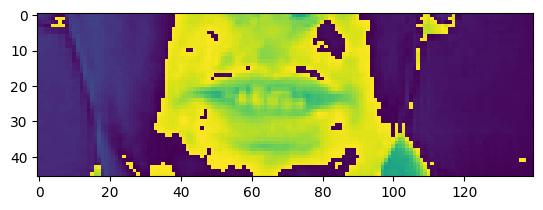

In [40]:
# 0:videos, 0: 1st video out of the batch,  0: return the first frame in the video
plt.imshow(val[0][0][35])

In [41]:
tf.strings.reduce_join([num_to_char(word) for word in val[1][0]])

<tf.Tensor: shape=(), dtype=string, numpy=b'place white by k three again'>

##  **3**. **Deep Neural** **Network**


In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, LSTM, Dense, Dropout, Bidirectional, MaxPool3D, Activation, Reshape, SpatialDropout3D, BatchNormalization, TimeDistributed, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler

In [43]:
data.as_numpy_iterator().next()[0][0].shape

(75, 46, 140, 1)

In [44]:
model = Sequential()
model.add(Conv3D(128, 3, input_shape=(75,46,140,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(256, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(75, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

# Add a Reshape layer to flatten the spatial dimensions before TimeDistributed
# The target shape is (time_steps, height * width * channels)
# The TimeDistributed layer will then apply the subsequent layers to each time step
# Changed the target shape of Reshape to flatten correctly.
model.add(TimeDistributed(Reshape((5 * 17 * 75,))))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

model.add(Dense(char_to_num.vocabulary_size()+1, kernel_initializer='he_normal', activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv3d (Conv3D)                 │ (None, 75, 46, 140,    │         3,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 75, 46, 140,    │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d (MaxPooling3D)    │ (None, 75, 23, 70,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_1 (Conv3D)               │ (None, 75, 23, 70,     │       884,992 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 75, 23, 70,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_1 (MaxPooling3D)  │ (None, 75, 11, 35,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_2 (Conv3D)               │ (None, 75, 11, 35, 75) │       518,475 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 75, 11, 35, 75) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_2 (MaxPooling3D)  │ (None, 75, 5, 17, 75)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 75, 6375)       │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 75, 256)        │     6,660,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 75, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 75, 256)        │       394,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 75, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 75, 41)         │        10,537 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,471,924 (32.32 MB)

 Trainable params: 8,471,924 (32.32 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
yhat = model.predict(val[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


In [47]:
tf.strings.reduce_join([num_to_char(x) for x in tf.argmax(yhat[0],axis=1)])

<tf.Tensor: shape=(), dtype=string, numpy=b'ojjjjjjjjeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeiiiiiiiii'>

In [48]:
tf.strings.reduce_join([num_to_char(tf.argmax(x)) for x in yhat[0]])

<tf.Tensor: shape=(), dtype=string, numpy=b'ojjjjjjjjeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeiiiiiiiii'>

In [49]:
model.input_shape

(None, 75, 46, 140, 1)

In [50]:
model.output_shape

(None, 75, 41)

# **4. Setup training Options and Train**

In [51]:
def scheduler(epoch, lr):
  if epoch < 30:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

In [52]:
def CTCLoss(y_true, y_pred):
  batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
  input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
  label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

  input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
  label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

  loss = tf.keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length)
  return loss

In [53]:
class ProduceExample(tf.keras.callbacks.Callback):
    def __init__(self, dataset) -> None:
        self.dataset = dataset.as_numpy_iterator()

    def on_epoch_end(self, epoch, logs=None) -> None:
        data = self.dataset.next()
        yhat = self.model.predict(data[0])
        decoded = tf.keras.backend.ctc_decode(yhat, [75,75], greedy=False)[0][0].numpy()
        for x in range(len(yhat)):
            print('Original:', tf.strings.reduce_join(num_to_char(data[1][x])).numpy().decode('utf-8'))
            print('Prediction:', tf.strings.reduce_join(num_to_char(decoded[x])).numpy().decode('utf-8'))
            print('~'*100)

In [54]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss=CTCLoss)

In [55]:
checkpoint_callback = ModelCheckpoint(os.path.join('models','checkpoint6.weights.h5'), monitor='loss', save_weights_only=True)

In [56]:
schedule_callback = LearningRateScheduler(scheduler)

In [57]:
example_callback = ProduceExample(data)

#4.1. Load checkpoints from Local Machine


In [ ]:
# Load the weights from the checkpoint
# Make sure the path matches the location where your checkpoint is saved
model.load_weights('./models/checkpoint1.weights.h5')
print("Weights loaded from checkpoint.")


# I guess it's not necessary.

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = './models/checkpoint1.weights.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [58]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

  # This cell is not necessary.

KeyboardInterrupt: 

In [ ]:
# Make sure to specify the correct filename including the extension
model.load_weights('models/checkpoint4.weights.h5')

# I guess it will not needed.

In [ ]:
# Run this instead of upper 2 cells. It's more effective.

import os
from google.colab import files

# Create the models directory if it doesn't exist
checkpoint_dir = './models'
os.makedirs(checkpoint_dir, exist_ok=True)
print(f"'{checkpoint_dir}' directory created or already exists.")

# Upload the files
print("Please select the checkpoint files to upload:")
uploaded = files.upload()

# Move the uploaded files to the models directory
for filename in uploaded.keys():
  source_path = os.path.join('./', filename)
  destination_path = os.path.join(checkpoint_dir, filename)
  os.rename(source_path, destination_path)
  print(f'Moved "{filename}" to "{checkpoint_path}"')

print("Upload and move complete.")

#4.2. Training the Model

In [59]:
model.fit(train, validation_data=test, epochs=30, callbacks=[checkpoint_callback, schedule_callback, example_callback])

Epoch 1/30
 66/450 ━━━━━━━━━━━━━━━━━━━━ 6:40 1s/step - loss: 132.7821

KeyboardInterrupt: 

#Download the checkpoints

In [ ]:
from google.colab import files
import os

# Specify the directory where your checkpoints are saved
checkpoint_dir = './models'

# List all files in the checkpoint directory
checkpoint_files = os.listdir(checkpoint_dir)

# Download each file
for file_name in checkpoint_files:
  file_path = os.path.join(checkpoint_dir, file_name)
  try:
    files.download(file_path)
    print(f"Downloaded: {file_name}")
  except Exception as e:
    print(f"Error downloading {file_name}: {e}")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded: checkpoint1.weights.h5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded: checkpoint3.weights.h5


# **5. Make Prediction**

In [ ]:
url = 'https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y'
output = 'checkpoints.zip'
gdown.download(url, output, quiet=False)
gdown.extractall('checkpoints.zip', 'models')

Downloading...
From (original): https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y
From (redirected): https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y&confirm=t&uuid=2552f7a5-8ee0-465c-a2de-d53ec2215ba3
To: /content/checkpoints.zip
100%|██████████| 94.5M/94.5M [00:00<00:00, 140MB/s]


['models/checkpoint.index',
 'models/__MACOSX/._checkpoint.index',
 'models/checkpoint.data-00000-of-00001',
 'models/__MACOSX/._checkpoint.data-00000-of-00001',
 'models/checkpoint',
 'models/__MACOSX/._checkpoint']

In [ ]:
tf.keras.models.load_model('models/model.keras',compile=False)

<Functional name=functional_11, built=True>

In [ ]:
test_data = iter(test)

In [ ]:
test_data.next()

(array([[[[[1.2791858 ],
           [1.2791858 ],
           [1.2791858 ],
           ...,
           [0.34886885],
           [0.34886885],
           [0.46515846]],
 
          [[1.2791858 ],
           [1.2791858 ],
           [1.2791858 ],
           ...,
           [0.38763204],
           [0.34886885],
           [0.46515846]],
 
          [[1.2016593 ],
           [1.2016593 ],
           [1.2016593 ],
           ...,
           [0.27134243],
           [0.19381602],
           [0.38763204]],
 
          ...,
 
          [[0.8915537 ],
           [0.8915537 ],
           [0.8915537 ],
           ...,
           [0.8527905 ],
           [1.0078433 ],
           [9.613275  ]],
 
          [[0.8140273 ],
           [0.8140273 ],
           [0.8140273 ],
           ...,
           [0.8527905 ],
           [0.8140273 ],
           [0.15505281]],
 
          [[0.8140273 ],
           [0.8140273 ],
           [0.8140273 ],
           ...,
           [0.6977377 ],
           [0.8527905 

In [ ]:
sample = test_data.next()

In [ ]:
yhat = model.predict(sample[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


In [ ]:
print('~'*100, 'REAL TEXT')
# Assuming sample[1] contains the real text labels for the batch
real_text = [tf.strings.reduce_join([num_to_char(word) for word in sentence]).numpy().decode('utf-8') for sentence in sample[1]]
for text in real_text:
    print(text)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ REAL TEXT
place green with e eight please
lay white with s four now


In [ ]:
decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75,75], greedy=True)[0][0].numpy()

In [ ]:
print('~'*100, 'PREDICTIONS')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ PREDICTIONS


[<tf.Tensor: shape=(), dtype=string, numpy=b'lflf'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'ufufufuf'>]

#Test on a video


In [ ]:
sample, test = load_data(tf.convert_to_tensor('.\\data\\s1\\bbal6n.mpg'))

In [ ]:
yhat = model.predict(tf.expand_dims(sample, axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [ ]:
print('~'*100, 'REAL TEXT')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]

# [tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in [sample[1]]]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ REAL TEXT


[<tf.Tensor: shape=(), dtype=string, numpy=b'llf'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'uulilfl'>]

In [ ]:
# Get the batch size from the model's prediction shape
batch_size = yhat.shape[0]

# Create an input_length list with the correct sequence length for each item in the batch
input_lengths = [75] * batch_size

# Decode the predictions using the correct input_length
decoded = tf.keras.backend.ctc_decode(yhat, input_length=input_lengths, greedy=True)[0][0].numpy()



# decoded = tf.keras.backend.ctc_decode(yhat, input_length=input_lengths, greedy=True)[0][0].numpy()

In [ ]:
print('~'*100, 'PREDICTIONS')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ PREDICTIONS


[<tf.Tensor: shape=(), dtype=string, numpy=b'u6lflf'>]

# **Test on a custom video**

In [61]:
sample = load_data(tf.convert_to_tensor('.\\data\\s1\\bbaf3s.mpg'))

In [64]:
print('~'*100, 'REAL TEXT')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in [sample[1]]]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ REAL TEXT


[<tf.Tensor: shape=(), dtype=string, numpy=b'bin blue at f three soon'>]

In [65]:
yhat = model.predict(tf.expand_dims(sample[0], axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


In [66]:
decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75], greedy=True)[0][0].numpy()

In [67]:
print('~'*100, 'PREDICTIONS')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ PREDICTIONS


[<tf.Tensor: shape=(), dtype=string, numpy=b''>]